This compares the effect of the `same_mode` mapping change on the staging database

TODO: Extend to the other databases as well

This assumes that the models have been built (using `build_save_model.py`) for the "before" values and `bin/build_label_model.py -a` for the "after" values.

They have been renamed to `user_label_first_round_<uuid>.before` and `user_label_first_round_<uuid>.after`, and `locations_first_round_<uuid>.before` and `locations_first_round_<uuid>.after`

A sample script that could be used for this renaming is: `for f in user_labels_first_round_*; do mv $f $f.before; done`

This script reads those files and works with them.

In [3]:
import os

In [12]:
os.environ["EMISSION_SERVER_HOME"] = "/Users/kshankar/e-mission/e-mission-server"

In [13]:
MODEL_DIR = os.getenv("EMISSION_SERVER_HOME"); MODEL_DIR

'/Users/kshankar/e-mission/e-mission-server'

In [14]:
import emission.analysis.modelling.tour_model_first_only.load_predict as lp

storage not configured, falling back to sample, default configuration
Connecting to database URL localhost


In [22]:
label_result_list = []
for l in os.listdir(MODEL_DIR):
    if l.startswith("user_labels_first_round") and not l.endswith(".after"):
        uuid = l.split("_")[4]
        before_ui_map = lp.loadModel(MODEL_DIR+"/"+l)
        after_ui_map = lp.loadModel(MODEL_DIR+"/"+l+".after")
        for cluster_label in before_ui_map:
            before_cluster_options = before_ui_map[cluster_label]
            after_cluster_options = after_ui_map[cluster_label]
            before_max_p = sorted(before_cluster_options, key=lambda lp: lp["p"])[-1]["p"]
            after_max_p = sorted(after_cluster_options, key=lambda lp: lp["p"])[-1]["p"]
            label_result_list.append({"user_id": uuid, "cluster_label": cluster_label,
                                      "before_unique_combo_len": len(before_cluster_options),
                                      "after_unique_combo_len": len(after_cluster_options),
                                      "before_max_p": before_max_p, "after_max_p": after_max_p})

In [23]:
import pandas as pd

In [25]:
label_result_df = pd.DataFrame(label_result_list); label_result_df

,user_id,cluster_label,before_unique_combo_len,after_unique_combo_len,before_max_p,after_max_p
0,b0c98c51-4bb9-4c67-9ec3-7814cfbdfc82,0,3,3,0.833333,0.833333
1,b0c98c51-4bb9-4c67-9ec3-7814cfbdfc82,1,1,1,1.000000,1.000000
2,b0c98c51-4bb9-4c67-9ec3-7814cfbdfc82,2,1,1,1.000000,1.000000
3,b0c98c51-4bb9-4c67-9ec3-7814cfbdfc82,3,1,1,1.000000,1.000000
4,b0c98c51-4bb9-4c67-9ec3-7814cfbdfc82,4,1,1,1.000000,1.000000
...,...,...,...,...,...,...
799,405b221a-be9e-43bc-86a5-7ca7fccf2227,85,1,1,1.000000,1.000000
800,405b221a-be9e-43bc-86a5-7ca7fccf2227,86,1,1,1.000000,1.000000
801,405b221a-be9e-43bc-86a5-7ca7fccf2227,87,1,1,1.000000,1.000000
802,405b221a-be9e-43bc-86a5-7ca7fccf2227,88,1,1,1.000000,1.000000


In [32]:
mismatched_df = label_result_df.query("before_max_p != after_max_p"); mismatched_df

,user_id,cluster_label,before_unique_combo_len,after_unique_combo_len,before_max_p,after_max_p
25,802667b6-371f-45b2-9c7a-bb051244836a,0,10,9,0.423077,0.615385
26,802667b6-371f-45b2-9c7a-bb051244836a,1,5,4,0.545455,0.727273
27,802667b6-371f-45b2-9c7a-bb051244836a,2,6,4,0.400000,0.500000
29,802667b6-371f-45b2-9c7a-bb051244836a,4,6,5,0.166667,0.333333
32,802667b6-371f-45b2-9c7a-bb051244836a,7,2,1,0.666667,1.000000
311,9b1fc847-e689-49c4-a7f8-d766f76f5248,0,6,5,0.333333,0.400000
312,9b1fc847-e689-49c4-a7f8-d766f76f5248,1,3,2,0.400000,0.600000
438,73c7bf7e-2552-4a6d-b211-62190d2322e2,1,6,5,0.222222,0.333333
439,73c7bf7e-2552-4a6d-b211-62190d2322e2,2,6,5,0.250000,0.312500
443,73c7bf7e-2552-4a6d-b211-62190d2322e2,6,3,2,0.571429,0.714286


In [33]:
len(mismatched_df)

21

In [38]:
print(mismatched_df.drop("user_id", axis=1).head().to_markdown())

|    |   cluster_label |   before_unique_combo_len |   after_unique_combo_len |   before_max_p |   after_max_p |
|---:|----------------:|--------------------------:|-------------------------:|---------------:|--------------:|
| 25 |               0 |                        10 |                        9 |       0.423077 |      0.615385 |
| 26 |               1 |                         5 |                        4 |       0.545455 |      0.727273 |
| 27 |               2 |                         6 |                        4 |       0.4      |      0.5      |
| 29 |               4 |                         6 |                        5 |       0.166667 |      0.333333 |
| 32 |               7 |                         2 |                        1 |       0.666667 |      1        |


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4')]

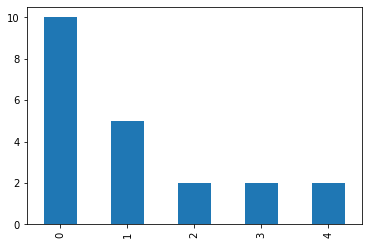

In [35]:
ax = mismatched_df.user_id.value_counts().plot(kind="bar")
ax.set_xticklabels(list(range(len(mismatched_df))))

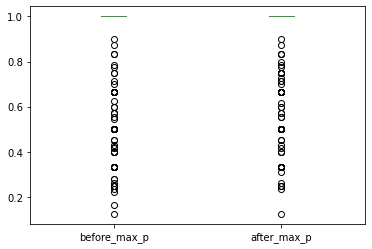

In [41]:
label_result_df[["before_max_p", "after_max_p"]].plot.box(by="user_id")

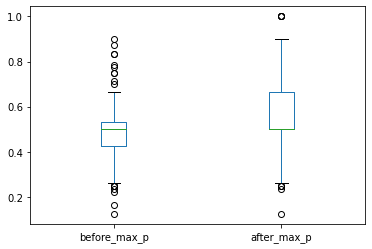

In [42]:
label_result_df.query("before_max_p < 1")[["before_max_p", "after_max_p"]].plot.box(by="user_id")

In [43]:
label_result_df.query("before_max_p < 1").after_max_p.describe()

count    122.000000
mean       0.536492
std        0.169980
min        0.125000
25%        0.500000
50%        0.500000
75%        0.666667
max        1.000000
Name: after_max_p, dtype: float64